In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = 'Financial Analytics data.csv'
data = pd.read_csv(file_path)
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [2]:
# Shifting the data in the 5th column to the 4th column
data['Sales Qtr - Crore'] = data['Sales Qtr - Crore'].fillna(data['Unnamed: 4'])

# Dropping the 5th column as it is no longer needed
data = data.drop(columns=['Unnamed: 4'])
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [3]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

S.No.                 0
Name                  0
Mar Cap - Crore       9
Sales Qtr - Crore    29
dtype: int64

In [4]:
# Converting data types to numeric
data['Mar Cap - Crore'] = pd.to_numeric(data['Mar Cap - Crore'], errors='coerce')
data['Sales Qtr - Crore'] = pd.to_numeric(data['Sales Qtr - Crore'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


In [5]:
data.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [6]:
# Removing rows with missing values
data_cleaned = data.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 486
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              459 non-null    int64  
 1   Name               459 non-null    object 
 2   Mar Cap - Crore    459 non-null    float64
 3   Sales Qtr - Crore  459 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.9+ KB


In [7]:
data_cleaned.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


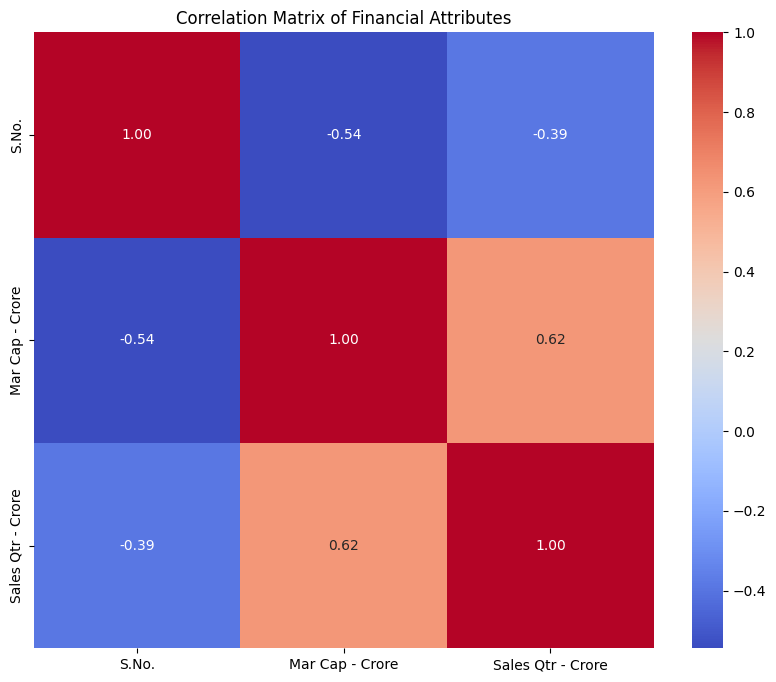

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
S.No.,1.000000,-0.544489,-0.392156
Mar Cap - Crore,-0.544489,1.000000,0.624409
Sales Qtr - Crore,-0.392156,0.624409,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix to find relationships between attributes
correlation_matrix = data_cleaned.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Financial Attributes')
plt.show()
correlation_matrix

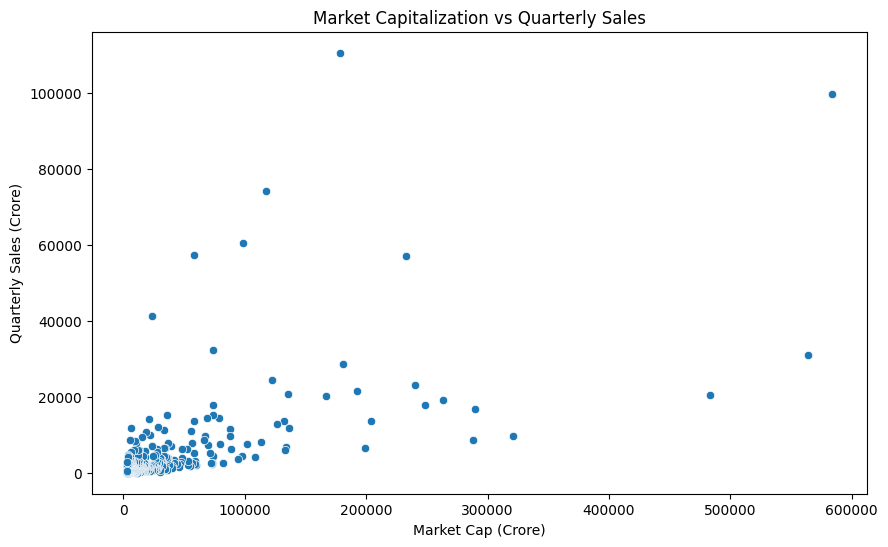

,S.No.,Mar Cap - Crore,Sales Qtr - Crore
count,459.000000,459.000000,459.000000
mean,246.575163,28870.974139,3807.789412
std,146.046444,60557.081792,9989.449987
min,1.000000,3017.070000,0.000000
25%,117.500000,4942.815000,534.910000
50%,243.000000,10442.090000,1137.170000
75%,371.500000,24707.320000,2730.195000
max,499.000000,583436.720000,110666.930000


In [9]:
# Scatter plot to show relationship between Market Cap and Quarterly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=data_cleaned)
plt.title('Market Capitalization vs Quarterly Sales')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()
data_cleaned.describe()

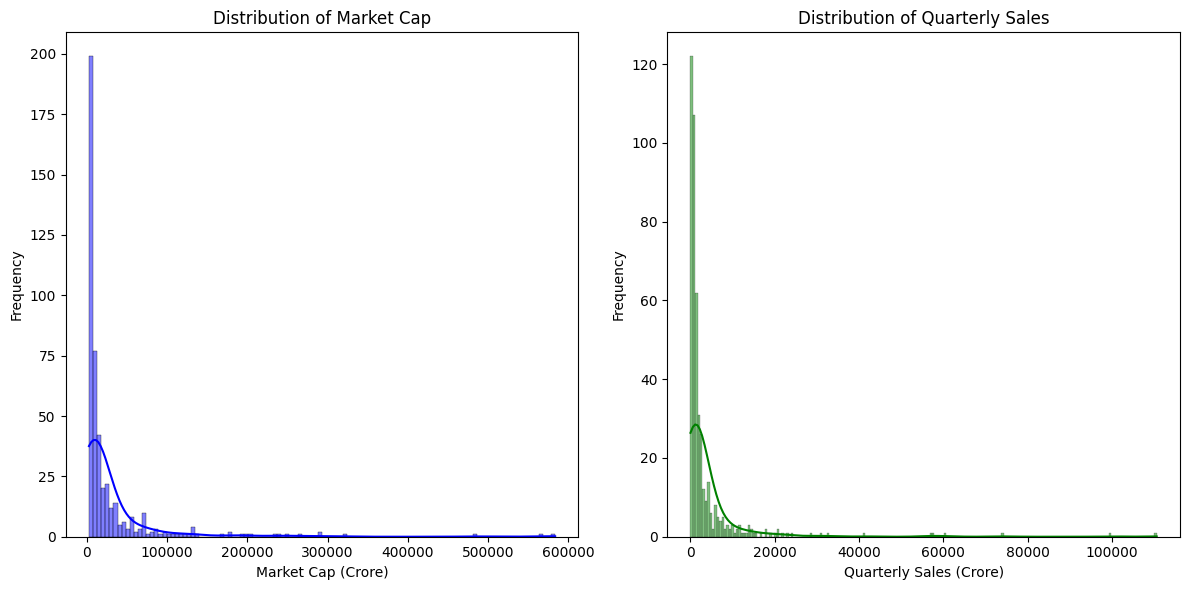

In [10]:
# Distribution of Market Cap and Quarterly Sales
plt.figure(figsize=(12, 6))

# Market Cap Distribution
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Mar Cap - Crore'], kde=True, color='blue')
plt.title('Distribution of Market Cap')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Frequency')

# Quarterly Sales Distribution
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['Sales Qtr - Crore'], kde=True, color='green')
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

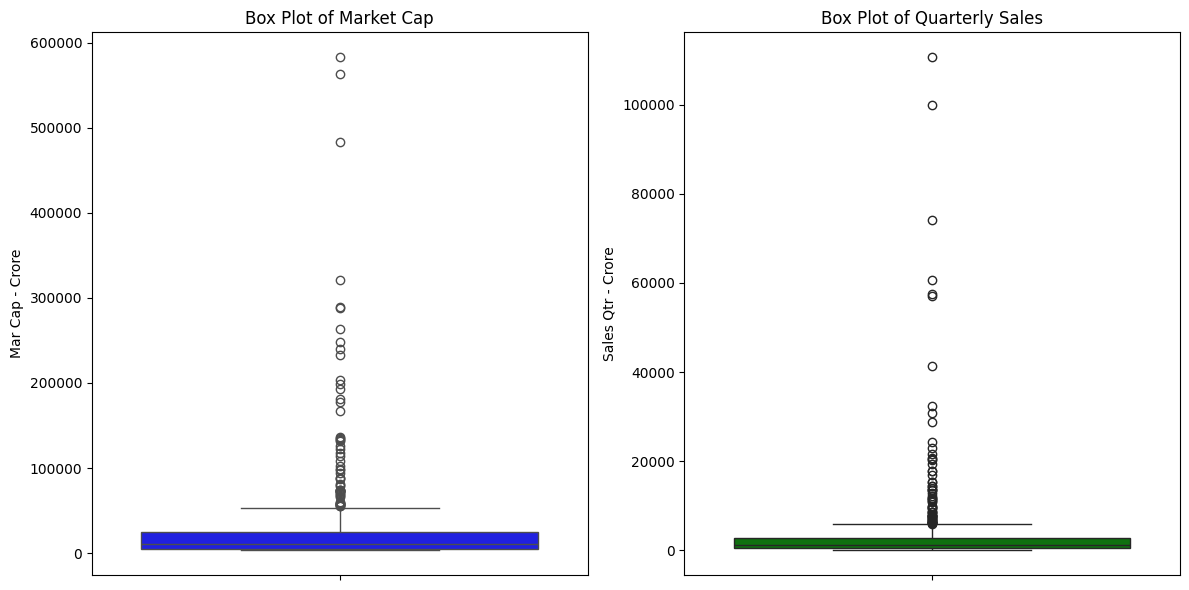

In [11]:
# Box Plots to show the spread and outliers
plt.figure(figsize=(12, 6))

# Box Plot for Market Cap
plt.subplot(1, 2, 1)
sns.boxplot(data=data_cleaned, y='Mar Cap - Crore', color='blue')
plt.title('Box Plot of Market Cap')

# Box Plot for Quarterly Sales
plt.subplot(1, 2, 2)
sns.boxplot(data=data_cleaned, y='Sales Qtr - Crore', color='green')
plt.title('Box Plot of Quarterly Sales')

plt.tight_layout()
plt.show()

In [12]:
import numpy as np
# Outlier detection using IQR method
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1
IQR

S.No.                  254.000
Mar Cap - Crore      19764.505
Sales Qtr - Crore     2195.285
dtype: float64

In [13]:
# Remove outliers
data_no_outliers = data_cleaned[~((data_cleaned < (Q1 - 1.5 * IQR)) |(data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

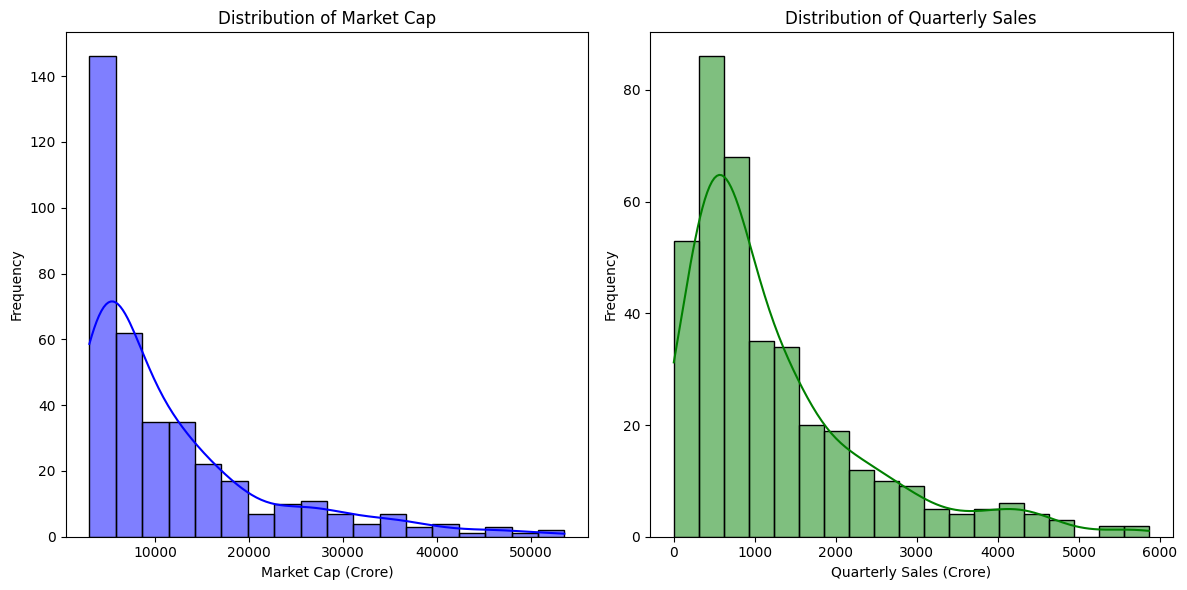

In [14]:
# Distribution of Market Cap and Quarterly Sales
plt.figure(figsize=(12, 6))

# Market Cap Distribution
plt.subplot(1, 2, 1)
sns.histplot(data_no_outliers['Mar Cap - Crore'], kde=True, color='blue')
plt.title('Distribution of Market Cap')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Frequency')

# Quarterly Sales Distribution
plt.subplot(1, 2, 2)
sns.histplot(data_no_outliers['Sales Qtr - Crore'], kde=True, color='green')
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Quarterly Sales (Crore)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

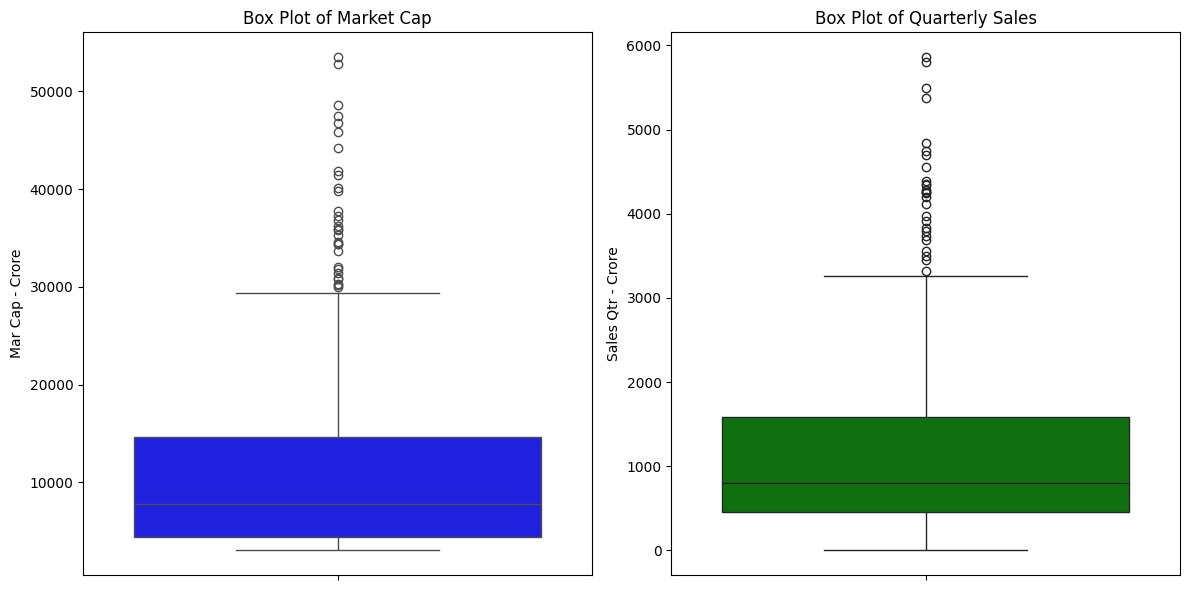

In [15]:
# Box Plots to show the spread and outliers
plt.figure(figsize=(12, 6))

# Box Plot for Market Cap
plt.subplot(1, 2, 1)
sns.boxplot(data=data_no_outliers, y='Mar Cap - Crore', color='blue')
plt.title('Box Plot of Market Cap')

# Box Plot for Quarterly Sales
plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers, y='Sales Qtr - Crore', color='green')
plt.title('Box Plot of Quarterly Sales')

plt.tight_layout()
plt.show()

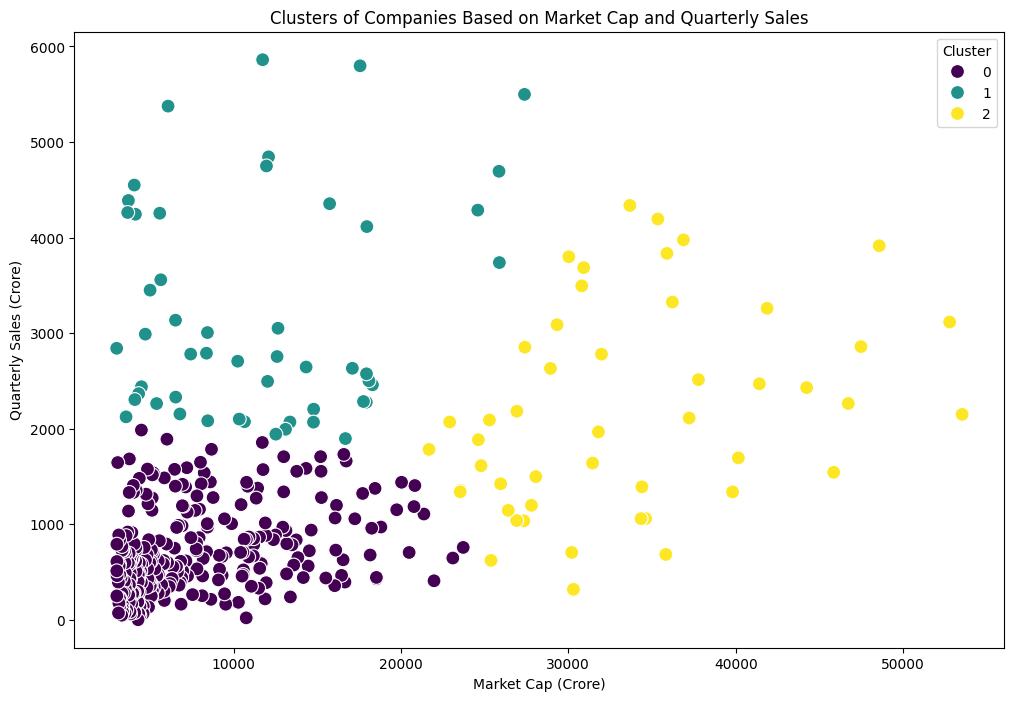

,Mar Cap - Crore,Sales Qtr - Crore
25th Percentile,4401.66,460.89
50th Percentile,7765.91,803.68
75th Percentile,14638.57,1583.95


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Clustering Analysis
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_no_outliers[['Mar Cap - Crore', 'Sales Qtr - Crore']])

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data_no_outliers['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data_no_outliers, x='Mar Cap - Crore', y='Sales Qtr - Crore', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters of Companies Based on Market Cap and Quarterly Sales')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.legend(title='Cluster')
plt.show()

# Trend Analysis
percentiles = np.percentile(data_no_outliers[['Mar Cap - Crore', 'Sales Qtr - Crore']], [25, 50, 75], axis=0)
percentile_labels = ['25th Percentile', '50th Percentile', '75th Percentile']

percentile_df = pd.DataFrame(percentiles, columns=['Mar Cap - Crore', 'Sales Qtr - Crore'], index=percentile_labels)


percentile_df

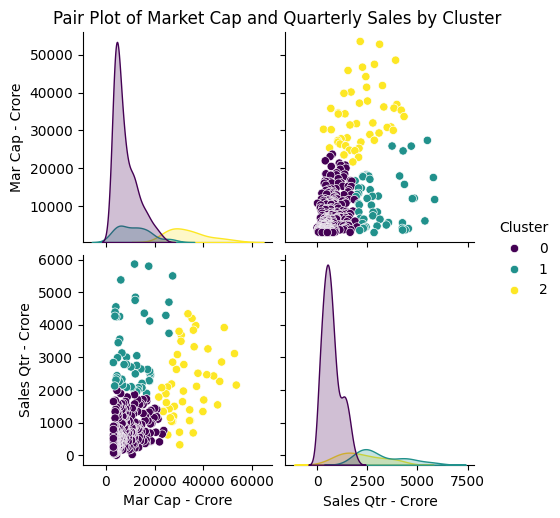

In [17]:
# Pair Plot to visualize relationships between variables
sns.pairplot(data_no_outliers, vars=['Mar Cap - Crore', 'Sales Qtr - Crore'], hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Market Cap and Quarterly Sales by Cluster', y=1.02)
plt.show()

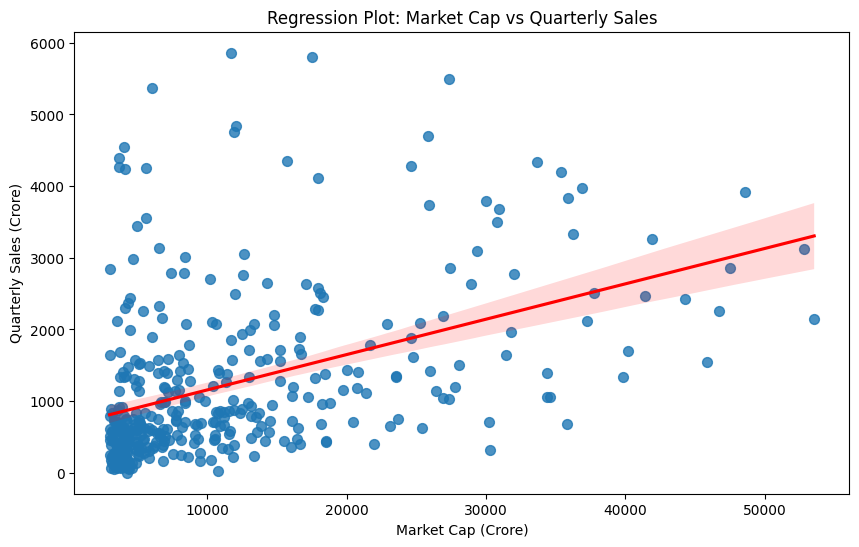

{'Coefficient': 0.04938754361959823, 'Intercept': 660.6409909982581}

In [18]:
from sklearn.linear_model import LinearRegression
# Regression Analysis
X = data_no_outliers[['Mar Cap - Crore']].values.reshape(-1, 1)
y = data_no_outliers['Sales Qtr - Crore'].values

regressor = LinearRegression()
regressor.fit(X, y)

regression_coefficients = regressor.coef_
regression_intercept = regressor.intercept_


# Display the regression coefficients, intercept, and clustering results
regression_results = {
    'Coefficient': regression_coefficients[0],
    'Intercept': regression_intercept
}

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=data_no_outliers, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot: Market Cap vs Quarterly Sales')
plt.xlabel('Market Cap (Crore)')
plt.ylabel('Quarterly Sales (Crore)')
plt.show()

regression_results

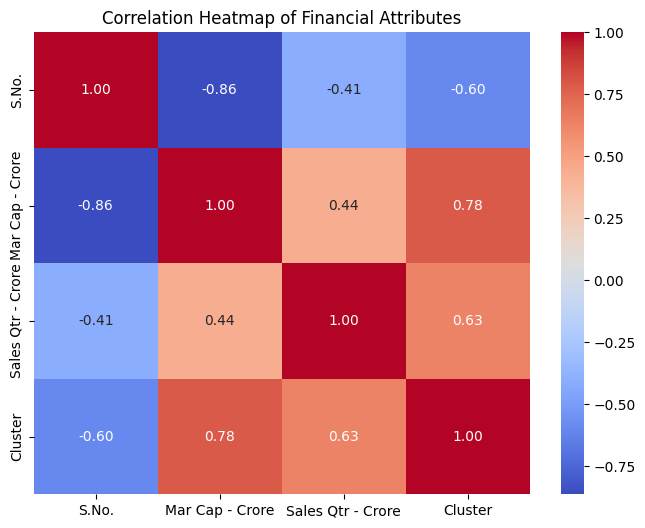

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Cluster
S.No.,1.000000,-0.864196,-0.411370,-0.599218
Mar Cap - Crore,-0.864196,1.000000,0.439268,0.784068
Sales Qtr - Crore,-0.411370,0.439268,1.000000,0.633668
Cluster,-0.599218,0.784068,0.633668,1.000000


In [19]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data_no_outliers.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Financial Attributes')
plt.show()
correlation_matrix